Total number of examples: 14
Training examples: 9
Test examples: 5
Accuracy of the model: 40.0


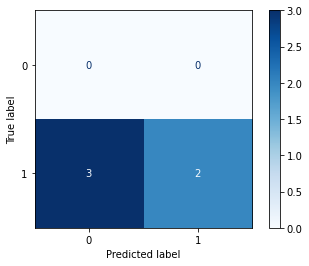

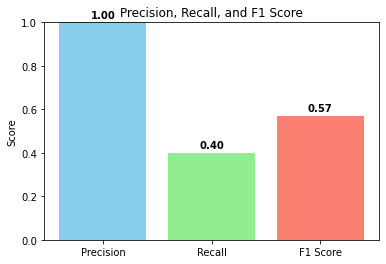

In [5]:
import math
import random
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 1. Encoding Class and Attributes
def encode_class_and_attributes(mydata):
    # Initialize LabelEncoder for encoding categorical data
    le = LabelEncoder()
   
    # Encode categorical columns (outlook, temp, humidity, windy)
    for i in range(len(mydata[0]) - 1):  # excluding the last column (class)
        column = [row[i] for row in mydata]
        le.fit(column)
        for j in range(len(mydata)):
            mydata[j][i] = le.transform([mydata[j][i]])[0]  # Encode each categorical attribute
   
    # Encode the class label (play)
    le.fit([row[-1] for row in mydata])  # The last column is 'play'
    for j in range(len(mydata)):
        mydata[j][-1] = le.transform([mydata[j][-1]])[0]
   
    return mydata, le

# 2. Splitting the Data
def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    test = list(mydata)
   
    while len(train) < train_num:
        index = random.randrange(len(test))
        train.append(test.pop(index))
    return train, test

# 3. Grouping Data by Class
def groupUnderClass(mydata):
    data_dict = {}
    for i in range(len(mydata)):
        if mydata[i][-1] not in data_dict:
            data_dict[mydata[i][-1]] = []
        data_dict[mydata[i][-1]].append(mydata[i])
    return data_dict

# 4. Calculating Mean and Standard Deviation for Class
def MeanAndStdDev(numbers):
    avg = np.mean(numbers)
    stddev = np.std(numbers)
    return avg, stddev

def MeanAndStdDevForClass(mydata):
    info = {}
    data_dict = groupUnderClass(mydata)
    for classValue, instances in data_dict.items():
        info[classValue] = [MeanAndStdDev(attribute) for attribute in zip(*instances)]
    return info

# 5. Calculating Gaussian and Class Probabilities
def calculateGaussianProbability(x, mean, stdev):
    epsilon = 1e-10
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev + epsilon, 2))))
    return (1 / (math.sqrt(2 * math.pi) * (stdev + epsilon))) * expo

def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

# 6. Predicting for Test Set
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel = max(probabilities, key=probabilities.get)
    return bestLabel

def getPredictions(info, test):
    predictions = [predict(info, instance) for instance in test]
    return predictions

# 7. Calculating Accuracy
def accuracy_rate(test, predictions):
    correct = sum(1 for i in range(len(test)) if test[i][-1] == predictions[i])
    return (correct / float(len(test))) * 100.0

# 8. Loading the CSV Data
df = pd.read_csv('PlayTennis.csv')

# Convert the DataFrame to a list of lists for Naive Bayes
mydata = df.values.tolist()

# Encode the class labels and attributes (categorical values)
encoded_data, label_encoder = encode_class_and_attributes(mydata)

# 9. Splitting Data into Training and Testing Sets
ratio = 0.7
train_data, test_data = splitting(encoded_data, ratio)

print('Total number of examples:', len(encoded_data))
print('Training examples:', len(train_data))
print('Test examples:', len(test_data))

# 10. Training the Model
info = MeanAndStdDevForClass(train_data)

# 11. Making Predictions
predictions = getPredictions(info, test_data)

# 12. Evaluating Accuracy
accuracy = accuracy_rate(test_data, predictions)
print('Accuracy of the model:', accuracy)

# 13. Confusion Matrix
y_true = [row[-1] for row in test_data]
y_pred = predictions

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# 14. Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()